In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_booking_data.csv')

# Display the first 5 rows
print(df.head())

         date  bookings  day_of_week  month  holiday  special_event weather  \
0  2018-01-01        19            0      1        0              0  Cloudy   
1  2018-01-01        12            0      1        1              0   Sunny   
2  2018-01-02        13            1      1        0              0   Sunny   
3  2018-01-02         9            1      1        0              0   Sunny   
4  2018-01-03        15            2      1        0              0   Rainy   

   distance  amenities  revenue  
0       3.5          3   535249  
1       3.4          3   245388  
2       3.2          3   357786  
3       3.4          5   156762  
4       4.7          2   186810  


In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical variables
label_encoder = LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])

# Normalize numerical data
scaler = MinMaxScaler()
df[['distance', 'amenities']] = scaler.fit_transform(df[['distance', 'amenities']])

# Display the preprocessed data
print(df.head())

         date  bookings  day_of_week  month  holiday  special_event  weather  \
0  2018-01-01        19            0      1        0              0        0   
1  2018-01-01        12            0      1        1              0        2   
2  2018-01-02        13            1      1        0              0        2   
3  2018-01-02         9            1      1        0              0        2   
4  2018-01-03        15            2      1        0              0        1   

   distance  amenities  revenue  
0     0.625   0.333333   535249  
1     0.600   0.333333   245388  
2     0.550   0.333333   357786  
3     0.600   1.000000   156762  
4     0.925   0.000000   186810  


In [4]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop(['date', 'bookings', 'revenue'], axis=1)  # Drop non-feature columns
y = df['bookings']  # Target variable (bookings)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1600, 7)
Testing data shape: (400, 7)


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# Predict on the test set
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.805707767857143
Root Mean Squared Error (RMSE): 19.66124198140058


Matplotlib is building the font cache; this may take a moment.


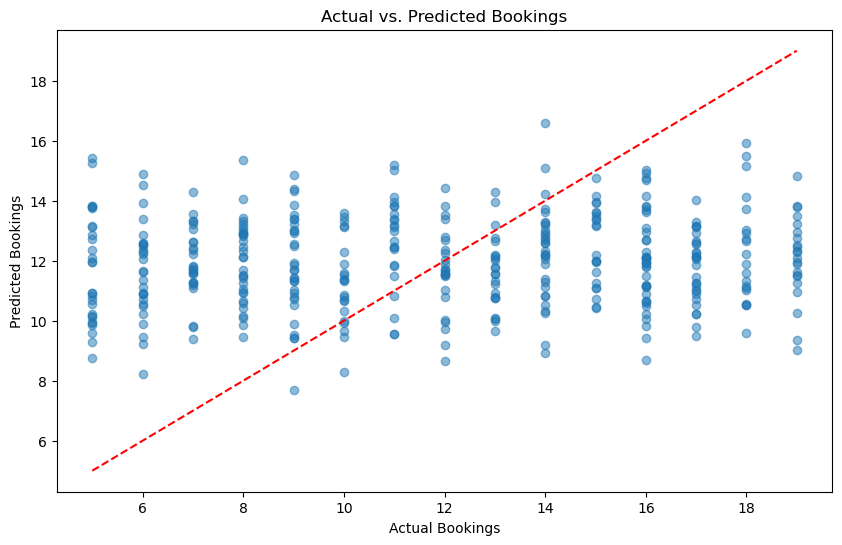

In [8]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted bookings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Bookings')
plt.ylabel('Predicted Bookings')
plt.title('Actual vs. Predicted Bookings')
plt.show()

In [9]:
import joblib

# Save the model to a file
joblib.dump(model, 'booking_forecast_model.pkl')

# Save the scaler and label encoder (for preprocessing new data)
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']